In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import matplotlib as mpl
import textwrap

In [2]:
pd.options.display.max_colwidth = 500

In [3]:
rcParams['font.family'] = 'Proxima Nova'
text_color = '#323232'
mpl.rcParams['text.color'] = text_color
mpl.rcParams['axes.labelcolor'] = text_color
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = 'white'

In [4]:
data = pd.read_csv('../data/q1_df.csv')

In [5]:
data.head()

,not_heard,heard,know_someone,experienced,label
0,34,35,21,8,Long waitlists for placement in childcare facilities because of lack of providers or staff
1,17,38,31,12,High and rising costs of childcare
2,23,41,25,9,People leaving jobs or switching to part-time work to provide childcare in their families
3,35,34,21,9,People delaying having children or having fewer children due to childcare considerations
4,18,40,29,10,People missing work to provide childcare in their families


In [6]:
data['ekh'] = data['experienced'] + data['know_someone'] + data['heard']
sub = data[['label', 'ekh']].sort_values('ekh')
sub.reset_index(inplace = True, drop = True)

In [7]:
sub

,label,ekh
0,Long waitlists for placement in childcare facilities because of lack of providers or staff,64
1,People delaying having children or having fewer children due to childcare considerations,64
2,People leaving jobs or switching to part-time work to provide childcare in their families,75
3,People missing work to provide childcare in their families,79
4,High and rising costs of childcare,81


In [19]:
max([len(x) for x in sub['label']])

90

In [8]:
sub['label'].values

array(['Long waitlists for placement in childcare facilities because of lack of providers or staff',
       'People delaying having children or having fewer children due to childcare considerations',
       'People leaving jobs or switching to part-time work to provide childcare in their families',
       'People missing work to provide childcare in their families',
       'High and rising costs of childcare'], dtype=object)

In [9]:
sub['label'].apply(lambda x: textwrap.fill(x, 50))

0    Long waitlists for placement in childcare\nfacilities because of lack of providers or staff
1      People delaying having children or having fewer\nchildren due to childcare considerations
2     People leaving jobs or switching to part-time work\nto provide childcare in their families
3                                    People missing work to provide childcare in their\nfamilies
4                                                             High and rising costs of childcare
Name: label, dtype: object

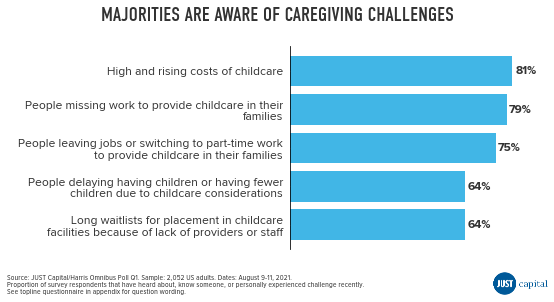

In [15]:
fig, ax = plt.subplots(figsize=(7.5,4))

fontsize_yticks = 12
fontsize_title = 20
fontsize_datalabs = 12
fontsize_caption = 8

ax.barh(sub['label'], sub['ekh'], color = '#41B6E6')
ax.set_xticks([])
ax.set_xlim(xmax = sub['ekh'].max()+5)
ax.set_yticks(sub.index)
ax.set_yticklabels(labels=sub['label'].apply(lambda x: textwrap.fill(x, 50)), 
                   fontsize=fontsize_yticks, color = text_color)
fig.suptitle("Majorities are aware of caregiving challenges".upper(), 
             x = 0.5, y = 1,
             ha='center', va='top', 
             fontsize=fontsize_title, fontproperties = 'DIN Condensed')

for x,y in zip(sub['ekh'], sub['label']):
    label = f"{x}%"
    ax.annotate(label,
                (x+5,y),
                ha='center', va='center',
                fontsize=fontsize_datalabs,
                weight = 'bold')  

sns.despine(bottom=True)
fig.tight_layout(rect = [0,0.12,1,1])

# create caption
captext = '''Source: JUST Capital/Harris Omnibus Poll Q1. Sample: 2,052 US adults. Dates: August 9-11, 2021. 
Proportion of survey respondents that have heard about, know someone, or personally experienced challenge recently.
See topline questionnaire in appendix for question wording.'''
fig.text(x = 0, y = 0, 
         ha = 'left', va = "bottom",
         s = captext, fontdict={'family':'Proxima Nova Condensed', 'fontsize':fontsize_caption})

# insert logo image
logo = plt.imread('../assets/Just Capital_Logo_RGB_500px_SSf.png')
newax = fig.add_axes([0.9,0,0.1,0.1], anchor='SE', zorder=1)
newax.imshow(logo)
newax.axis('off')

# save image file
#plt.show();
fig.savefig('../images/fig01.png', transparent = True, dpi=300, bbox_inches='tight');